INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple de composantes connectées.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Lecture d'images pour entraîner le modèle. (Images provenant PETS 2006, http://www.cvg.reading.ac.uk/PETS2006/data.html)

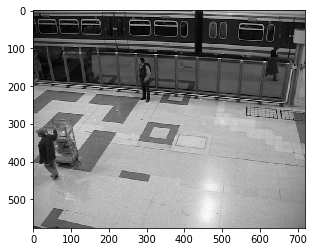

In [2]:
image1 = (cv2.imread('in000001.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
image2 = (cv2.imread('in000003.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
image3 = (cv2.imread('in000004.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
image4 = (cv2.imread('in000005.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
imagedet = (cv2.imread('in000235.jpg',cv2.IMREAD_GRAYSCALE)).astype(float)
plt.imshow(imagedet, cmap = plt.get_cmap('gray'))
plt.show()

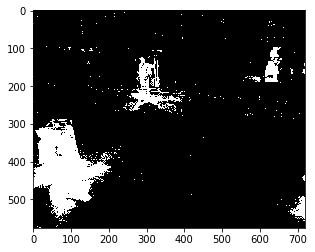

In [3]:
# Application d'une méthode de détection de changements

# Seuils de décision
R = 10
nbEchantillonsmin = 2

# Vecteur de 4 échantillons pour chaque pixel.
SimEch1 = np.abs(imagedet - image1)>= R
SimEch2 = np.abs(imagedet - image2)>= R
SimEch3 = np.abs(imagedet - image3)>= R
SimEch4 = np.abs(imagedet - image4)>= R

# Somme des correspondances
EchCorr = SimEch1.astype('int') + SimEch2.astype('int') + SimEch3.astype('int') + SimEch4.astype('int')
Avantplan = EchCorr >= nbEchantillonsmin

plt.imshow(~Avantplan,plt.get_cmap('binary'))
plt.show()

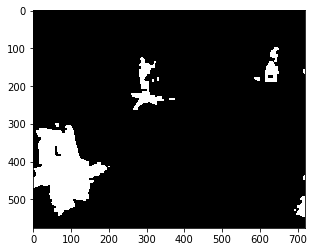

In [4]:
#Nettoyage de l'image...
kernel = np.ones((5,5),np.uint8)
Avantplan = cv2.morphologyEx(Avantplan.astype('uint8'), cv2.MORPH_OPEN, kernel)
Avantplan = cv2.morphologyEx(Avantplan, cv2.MORPH_CLOSE, kernel)
plt.imshow(~Avantplan,plt.get_cmap('binary'))
plt.show()

Application de l'algorithme des composantes connectées.

In [5]:
nbcomposantes, etiquettes = cv2.connectedComponents(Avantplan.astype('uint8'), 8, cv2.CV_32S)
print(nbcomposantes)

15


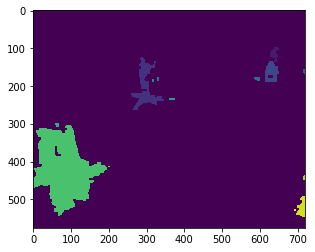

In [6]:
plt.imshow(etiquettes)
plt.show()